In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping  
import glob as gb 
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-17 03:47:25.909070: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 03:47:26.552400: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
IMG_SIZE = 224
SEED = 1000
BATCH_SIZE = 16
TRAIN_DIR = '/mnt/g/food-101.zip/Training_data'
TEST_DIR = '/mnt/g/food-101.zip/Test_data'

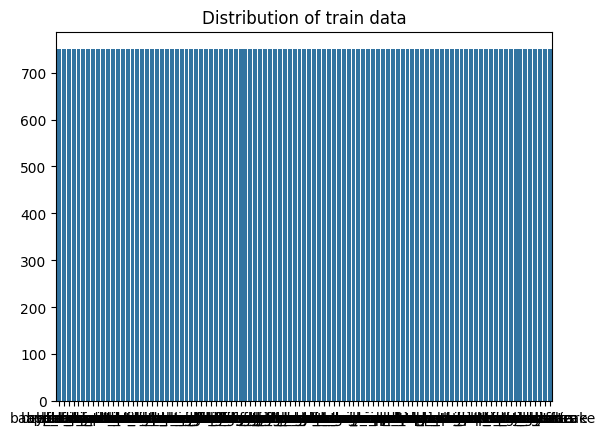

75750


In [3]:
categories = []
class_count=[]
train_exm = 0
for f in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname=str(TRAIN_DIR + '/' + f + '/*.jpg'))
    categories.append(f)
    class_count.append(len(files))
    train_exm += len(files)

sns.barplot(x=categories, y=class_count).set_title("Distribution of train data")

plt.show()
print(train_exm)

In [4]:
# def preprocess_input(img):
#     img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
#     img = tf.keras.applications.efficientnet.preprocess_input(img)
#     return img

train_gen = ImageDataGenerator(
   rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
    #dtype=tf.float32

)

test_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
    #dtype=tf.float32
)

In [5]:
train_batch = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset = 'training',
    seed=SEED
)

valid_batch = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset = 'validation',
    seed=SEED
)

test_batch = test_gen.flow_from_directory(
    directory = TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    seed = SEED
)

Found 60600 images belonging to 101 classes.
Found 15150 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [6]:
img_shape = (IMG_SIZE, IMG_SIZE) +(3,)
base_model = tf.keras.applications.EfficientNetB7(input_shape=img_shape, include_top=False, weights='imagenet')
base_model.summary()


2024-05-17 03:47:48.767571: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 03:47:48.874490: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 03:47:48.874558: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 03:47:48.877316: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 03:47:48.877395: I external/local_xla/xla/stream_executor

Model: "efficientnetb7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      2,048 │ block1a_se_excit

 Total params: 64,097,687 (244.51 MB)

 Trainable params: 63,786,960 (243.33 MB)

 Non-trainable params: 310,727 (1.19 MB)

In [7]:
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Corrected dropout without activation
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(101, activation='softmax')(x)
model = tf.keras.Model(inputs, output)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb7 (Functional)     │ (None, 7, 7, 2560)     │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2560)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,586,172 (250.19 MB)

 Trainable params: 65,275,445 (249.01 MB)

 Non-trainable params: 310,727 (1.19 MB)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss=tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy'])  

In [9]:
h = model.fit(train_batch, 
    steps_per_epoch=642,
validation_data=valid_batch,
validation_steps=158,
 epochs=50, 
 callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
 verbose=1)

Epoch 1/50


/home/tan/anaconda3/envs/myenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715896206.247535   55898 service.cc:145] XLA service 0x7f4bcc0018c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715896206.247578   55898 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-05-17 03:50:09.099249: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-17 03:50:18.174462: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900
2024-0

642/642 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.0191 - loss: 4.5796

I0000 00:00:1715896562.895809   59483 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_6731', 4 bytes spill stores, 4 bytes spill loads



642/642 ━━━━━━━━━━━━━━━━━━━━ 470s 251ms/step - accuracy: 0.0192 - loss: 4.5795 - val_accuracy: 0.1614 - val_loss: 3.8932
Epoch 2/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 146s 228ms/step - accuracy: 0.1389 - loss: 3.8369 - val_accuracy: 0.3809 - val_loss: 2.7035
Epoch 3/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 145s 227ms/step - accuracy: 0.2861 - loss: 3.0588 - val_accuracy: 0.4846 - val_loss: 2.1721
Epoch 4/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 144s 224ms/step - accuracy: 0.3914 - loss: 2.5403 - val_accuracy: 0.5550 - val_loss: 1.8480
Epoch 5/50
 62/642 ━━━━━━━━━━━━━━━━━━━━ 1:32 160ms/step - accuracy: 0.4561 - loss: 2.3496

2024-05-17 04:05:28.010019: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng48{k0=1,k2=5,k5=2,k14=6} for conv (f32[2304,1,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,2304,7,7]{3,2,1,0}, f32[8,2304,7,7]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, feature_group_count=2304, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-05-17 04:05:28.563497: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.553592381s
Trying algorithm eng48{k0=1,k2=5,k5=2,k14=6} for conv (f32[2304,1,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,2304,7,7]{3,2,1,0}, f32[8,2304,7,7]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, feature_group_count=2304, custom_call_target="__cudnn$convBackwardFilter

642/642 ━━━━━━━━━━━━━━━━━━━━ 348s 542ms/step - accuracy: 0.4581 - loss: 2.2923 - val_accuracy: 0.5839 - val_loss: 1.7154
Epoch 6/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.5060 - loss: 2.0628

2024-05-17 04:11:18.396614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 04:11:18.397717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/home/tan/anaconda3/envs/myenv/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


642/642 ━━━━━━━━━━━━━━━━━━━━ 135s 211ms/step - accuracy: 0.5055 - loss: 2.0626 - val_accuracy: 0.6159 - val_loss: 1.6020
Epoch 7/50


2024-05-17 04:11:53.726880: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 04:11:53.727825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 148s 228ms/step - accuracy: 0.5390 - loss: 1.9205 - val_accuracy: 0.6349 - val_loss: 1.5120
Epoch 8/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 146s 227ms/step - accuracy: 0.5523 - loss: 1.8540 - val_accuracy: 0.6531 - val_loss: 1.5130
Epoch 9/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 146s 227ms/step - accuracy: 0.5870 - loss: 1.7114 - val_accuracy: 0.6384 - val_loss: 1.5643
Epoch 10/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 145s 225ms/step - accuracy: 0.6175 - loss: 1.5967 - val_accuracy: 0.6835 - val_loss: 1.3921
Epoch 11/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 142s 221ms/step - accuracy: 0.6199 - loss: 1.5540 - val_accuracy: 0.6938 - val_loss: 1.3244
Epoch 12/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.6431 - loss: 1.4658

2024-05-17 04:25:41.303701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 04:25:41.305066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 124s 193ms/step - accuracy: 0.6430 - loss: 1.4652 - val_accuracy: 0.7032 - val_loss: 1.3631
Epoch 13/50


2024-05-17 04:26:04.048617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 04:26:04.048930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 148s 228ms/step - accuracy: 0.6449 - loss: 1.4834 - val_accuracy: 0.7057 - val_loss: 1.3641
Epoch 14/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 147s 229ms/step - accuracy: 0.6569 - loss: 1.4029 - val_accuracy: 0.7097 - val_loss: 1.4114
Epoch 15/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 145s 226ms/step - accuracy: 0.6831 - loss: 1.3267 - val_accuracy: 0.7235 - val_loss: 1.3107
Epoch 16/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 145s 225ms/step - accuracy: 0.6907 - loss: 1.2765 - val_accuracy: 0.6986 - val_loss: 1.4047
Epoch 17/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 144s 224ms/step - accuracy: 0.6965 - loss: 1.2697 - val_accuracy: 0.7152 - val_loss: 1.3028
Epoch 18/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.7102 - loss: 1.2229

2024-05-17 04:39:53.585975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 04:39:53.587127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 128s 200ms/step - accuracy: 0.7099 - loss: 1.2236 - val_accuracy: 0.7155 - val_loss: 1.3041
Epoch 19/50


2024-05-17 04:40:20.880311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 04:40:20.880558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 148s 228ms/step - accuracy: 0.7164 - loss: 1.1530 - val_accuracy: 0.7243 - val_loss: 1.2803
Epoch 20/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 146s 227ms/step - accuracy: 0.7287 - loss: 1.1340 - val_accuracy: 0.7195 - val_loss: 1.3636
Epoch 21/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 145s 226ms/step - accuracy: 0.7296 - loss: 1.0954 - val_accuracy: 0.7188 - val_loss: 1.3103
Epoch 22/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 144s 224ms/step - accuracy: 0.7277 - loss: 1.1082 - val_accuracy: 0.7160 - val_loss: 1.3865
Epoch 23/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 145s 226ms/step - accuracy: 0.7367 - loss: 1.0859 - val_accuracy: 0.7282 - val_loss: 1.3163
Epoch 24/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.7547 - loss: 1.0394

2024-05-17 04:54:13.345533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 04:54:13.347481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 132s 206ms/step - accuracy: 0.7541 - loss: 1.0411 - val_accuracy: 0.7426 - val_loss: 1.2029
Epoch 25/50


2024-05-17 04:54:40.629208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 04:54:40.629559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 148s 229ms/step - accuracy: 0.7594 - loss: 0.9910 - val_accuracy: 0.7381 - val_loss: 1.2469
Epoch 26/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 145s 226ms/step - accuracy: 0.7540 - loss: 1.0073 - val_accuracy: 0.7334 - val_loss: 1.2794
Epoch 27/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 145s 226ms/step - accuracy: 0.7637 - loss: 0.9609 - val_accuracy: 0.7354 - val_loss: 1.2054
Epoch 28/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 145s 226ms/step - accuracy: 0.7637 - loss: 0.9649 - val_accuracy: 0.7488 - val_loss: 1.2083
Epoch 29/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 144s 224ms/step - accuracy: 0.7843 - loss: 0.8531 - val_accuracy: 0.7267 - val_loss: 1.3812


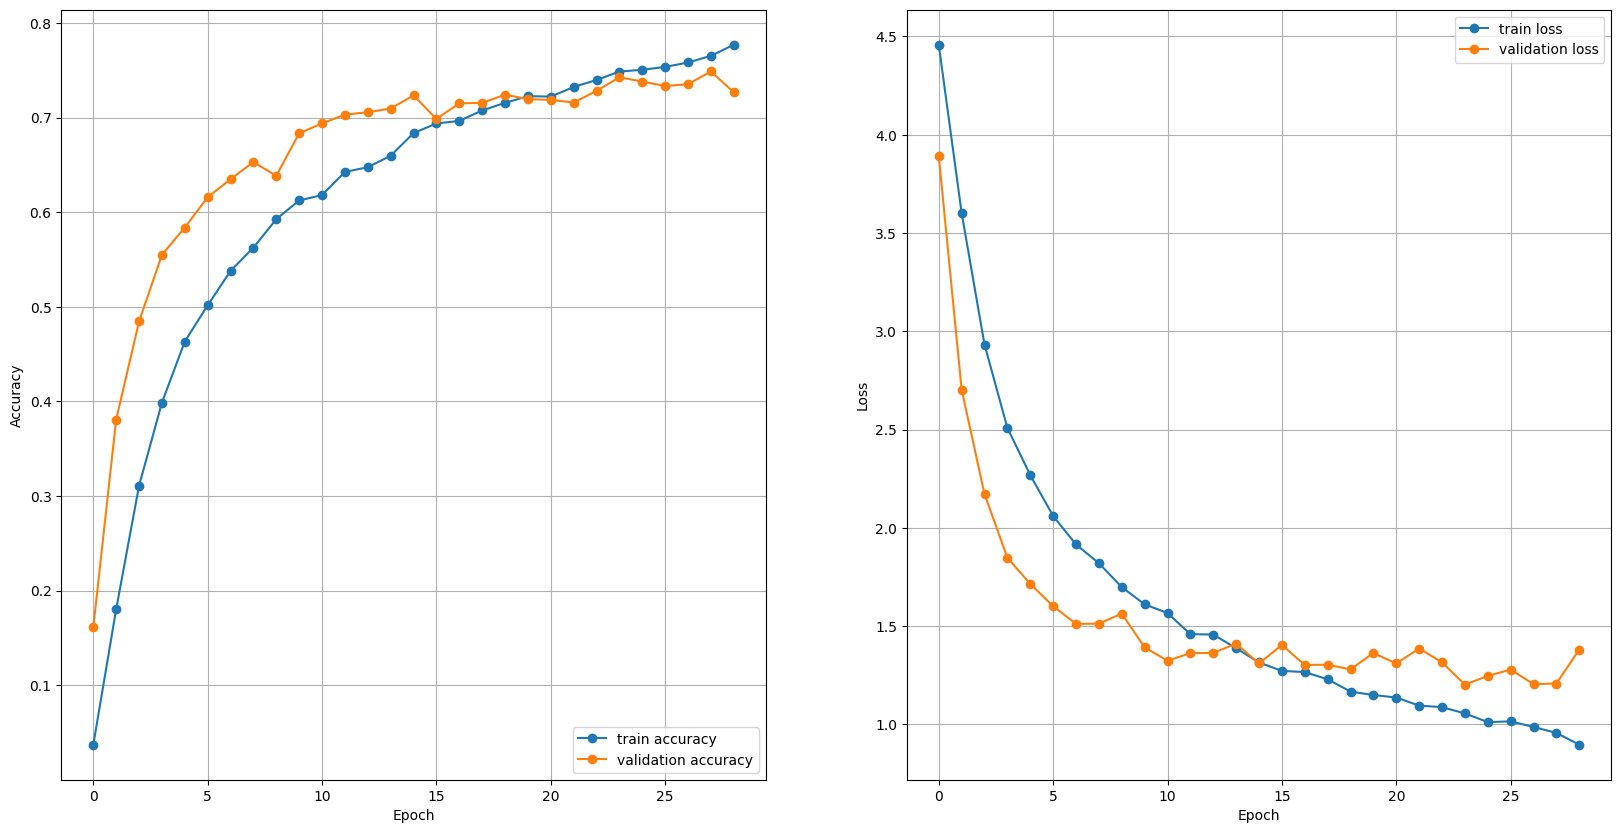

: 

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()